## Introduction

Many U.S cities have communal bike sharing stations where you can rent bicycles by the hour or day. Washington, D.C. is one of these cities. The District collects detailed data on the number of bicycles people rent by the hour & day

### Description of relevant columns
`instant`- Unique sequential ID number for each row

`dteday` - The dates of rentals

`season` - The season in which the rentals occurred

`yr` - the year the rentals occurred

`mnth` - The month the rentals occurred

`hr` - The hour the rentals occurred

`holiday` - Whether or not the day was a holiday

`weakday` - the day of the weak (as a number, from `0` - `7`)

`workingday` -  Whether or not the day was a working day

`weathersit` - The weather (categorical variable)

`temp` - The temperature, on a `0-1` scale

`atemp` - the adjusted temperature

`hum` - The humidity, on a `0-1` scale

`windspread` - The wind speed, on a `0-1` scale

`casual` - The number of casual rides (people who hadn't previously signed up with the bike sharing program)

`registered` - The number of registered riders (people who had already signed up)

`cnt` - The total number of bike rentals (`casual` + `registered`)

**Goal**: Predict the total number of bikes people rented in a given hour using the `cnt` column with other columns as features, except for `casual` & `registered` with different `machine learning models`

Hadi Fanaee-T at the [University of Porto](https://sigarra.up.pt/up/pt/web_base.gera_pagina?p_pagina=home) compiled this data into a CSV file. The file contains `17380` rows, which each row representing the number of bike rentals for a single hour of a single day. You can download the dataset at [Irvine's webiste, University of California](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bike_rentals = pd.read_csv('bike_rental_hour.csv')
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
bike_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


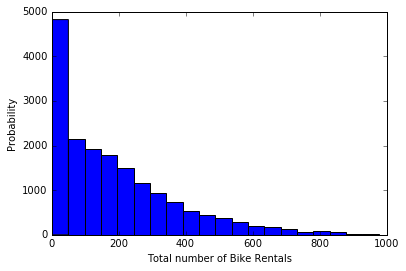

In [4]:
plt.hist(bike_rentals['cnt'], bins = 20)
plt.ylabel('Probability')
plt.xlabel('Total number of Bike Rentals')
plt.show()

In [5]:
## Use corr to explore how each column is correlated with cnt
bike_rentals.corr()['cnt']

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

Except for `holiday`, `weathersit`, `hum`, other columns are positive correlated with the number of bikes renting

## Calculating features

We can calculte features before applying machine learning models because features can enhance the accuracy of models by introducing new information or distilling existing information

In [6]:
def assign_label(value):
    if (6 <= value and value < 12): 
        return 1
    elif (value >= 12 and value < 18):
        return 2
    elif (value >= 18) and (value < 24):
        return 3
    elif (value >= 0 and value < 6):
        return 4

In [7]:
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)
bike_rentals['time_label'].value_counts()

2    4375
3    4368
1    4360
4    4276
Name: time_label, dtype: int64

## Spliting the data into train & test set

For this problem, because we're trying to predict the number of bike rented in a given hour, we'll choose **Mean Squared Error (MSE)** so that the large error can be magnified

In [8]:
# Select 80% of the rows to be on training set using sample()
train = bike_rentals.sample(frac = 0.8, random_state = 1)

# Select the rows that are not in train to be the testing set
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]
test.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,4
14,15,2011-01-01,1,0,1,14,0,6,0,2,0.46,0.4545,0.72,0.2836,35,71,106,2
15,16,2011-01-01,1,0,1,15,0,6,0,2,0.44,0.4394,0.77,0.2985,40,70,110,2
18,19,2011-01-01,1,0,1,18,0,6,0,3,0.42,0.4242,0.88,0.2537,9,26,35,3
20,21,2011-01-01,1,0,1,20,0,6,0,2,0.40,0.4091,0.87,0.2537,11,25,36,3


## Applying Linear Regression

We'll apply linear regression to the data because there're many columns higly correlated with `cnt`

We'll also need to ignore `casual` & `registered` column because those number added together to get the `cnt`. Thus, it doesn't make sense to predict the number of bike rentals based on them

In [9]:
predict_col =['hr', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
           'season', 'holiday', 'weekday', 'workingday']

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(train[predict_col], train['cnt'])

prediction = model.predict(test[predict_col])
reg_mse = mean_squared_error(test['cnt'], prediction)
reg_mse

20836.999068609362

The error seems to be large, which is expected from mean squared error because this metric will square up the value. It also shows that model might be underfitting because as usual, linear regression is quite straightforward and we might need to try other model to find the least error

## Applying Decicion Trees

Now, we'll use decision trees model because it tend to predict outcomes much more reliably than linear regression model, because of its complexity and its hyperparameters' variety

In [11]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state = 1)
tree.fit(train[predict_col], train['cnt'])

y_pred = tree.predict(test[predict_col])
tree_mse = mean_squared_error(test['cnt'], y_pred)
tree_mse

9103.721231300346

Comparing with the previous linear regression model, our error has been lowered a lot but is still high. Part of it is because decision tends to overfit, particularly when we don't tweak parameters like maximum depth (which we didn't) or the number of sample leafs. The other reasons is becasue decision tree are also prone to instability -- small changes in the input data can result in very different output model

In [12]:
model_2 = DecisionTreeRegressor(random_state = 1, min_samples_split = 5, max_leaf_nodes = 2)
model_2.fit(train[predict_col], train['cnt'])

predictions = model_2.predict(test[predict_col])
tree_2_mse = mean_squared_error(test['cnt'], predictions)
tree_2_mse

22046.43556585738

In [19]:
# We can try GridSearchCV to find out the best parameters
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 5)),
          'min_samples_split': [2, 3, 4],
          'criterion' : ['mse', 'mae'],
          'max_depth': [1, 5, 10]
}

tree_2 = DecisionTreeRegressor(random_state = 2)
grid = GridSearchCV(tree_2, params, cv = 5)
grid.fit(train[predict_col], train['cnt'])

grid_predict = grid.predict(test[predict_col])
grid_mse = mean_squared_error(test['cnt'], grid_predict)
print('Best parameters are:', grid.best_params_)
print('Best estimator is:', grid.best_estimator_)

Best parameters are: {'criterion': 'mse', 'max_depth': 5, 'max_leaf_nodes': 4, 'min_samples_split': 2}
Best estimator is: DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=4, min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=2, splitter='best')


In [20]:
grid_mse

17182.487483146302

## Applying Random Forests

Now, we'll apply Random Forest algorithm, which improves on the decision tree algorithm. One pro of this model is it tend to be much more accurate than simple models like linear regression

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
forest = RandomForestRegressor(random_state = 42, max_leaf_nodes=5, 
                               min_samples_split = 3, criterion = 'mae', 
                               max_depth = 5)
forest.fit(train[predict_col], train['cnt'])
forest_prediction = forest.predict(test[predict_col])
forest_mse = mean_squared_error(test['cnt'], forest_prediction)
forest_mse

15556.051488060988

We can see that comparing to DecisionTree model, Random forest algorithm performs better but still, the result shows no improvement in mean squared error, partly because due to the way this algorithm is constructed, it tends to overfit (but less than decision tree)

## Conclusion

In the future projects, we can try GridSearchCV to find out the best parameter